In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

#### Preprocessing

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
for i in ['SL','SW','PL']:
    data[i] = data[i].fillna(data[i].median())

In [7]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [8]:
y = data['Classification']
X = data.drop('Classification', axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
stdsclr = StandardScaler()

In [11]:
X = stdsclr.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression()

In [16]:
model1 = log_reg.fit(X_train, y_train)

In [17]:
y_pred = model1.predict(X_test)

#### KNN

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model2 = knn.fit(X_train, y_train)
    y_pred_knn = model2.predict(X_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric_k.append(acc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

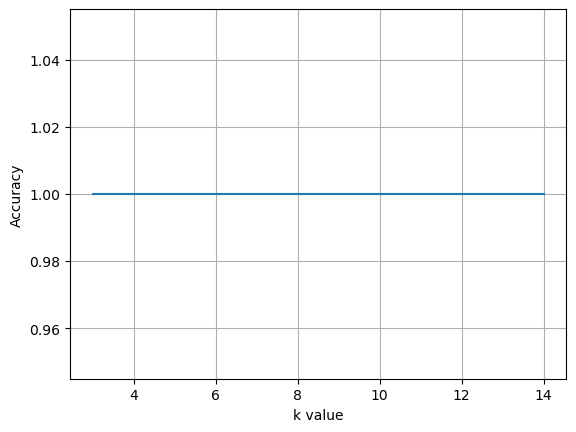

In [20]:
plt.plot(neighbors, metric_k)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [21]:
knn = KNeighborsClassifier(n_neighbors=4)
model2 = knn.fit(X_train, y_train)
y_pred_knn = model2.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### SVM

In [22]:
from sklearn.svm import SVC

In [23]:
# rbf kernel

In [24]:
svm_rbf = SVC(kernel='rbf')

In [25]:
svm_model1 = svm_rbf.fit(X_train,y_train)

In [26]:
y_pred_rbf = svm_rbf.predict(X_test)

In [27]:
#linear kernel

In [28]:
svm_lnr = SVC(kernel='linear')

In [29]:
svm_model2 = svm_lnr.fit(X_train,y_train)

In [30]:
y_pred_lnr = svm_lnr.predict(X_test)

In [31]:
#polynomial kernel

In [32]:
svm_poly = SVC(kernel='poly')

In [33]:
svm_model3 = svm_poly.fit(X_train,y_train)

In [34]:
y_pred_poly = svm_poly.predict(X_test)

#### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt_clf = DecisionTreeClassifier()

In [37]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred_dt = dt_clf.predict(X_test)

#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_clf = RandomForestClassifier()

In [41]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred_rf = rf_clf.predict(X_test)

#### Model Comparison


confusion matrix

In [43]:
print ('Logistic Regression:\n',confusion_matrix(y_test, y_pred))
print ('KNN:\n',confusion_matrix(y_test, y_pred_knn))
print ('SVM_rbf:\n',confusion_matrix(y_test, y_pred_rbf))
print ('SVM_linear:\n',confusion_matrix(y_test, y_pred_lnr))
print ('SVM_polynomial:\n',confusion_matrix(y_test, y_pred_poly))
print ('Decision Tree:\n',confusion_matrix(y_test, y_pred_dt))
print ('Random Forest:\n',confusion_matrix(y_test, y_pred_rf))


Logistic Regression:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
KNN:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
SVM_rbf:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
SVM_linear:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
SVM_polynomial:
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
Decision Tree:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Random Forest:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


Accuracy Score

In [44]:
print('Logistic Regression:',accuracy_score(y_test,y_pred))
print('KNN:',accuracy_score(y_test,y_pred_knn))
print('SVM_rbf:',accuracy_score(y_test,y_pred_rbf))
print('SVM_linear:',accuracy_score(y_test,y_pred_lnr))
print('SVM_polynomial:',accuracy_score(y_test,y_pred_poly))
print('Decision Tree:',accuracy_score(y_test,y_pred_dt))
print('Random Forest:',accuracy_score(y_test,y_pred_rf))

Logistic Regression: 0.9736842105263158
KNN: 1.0
SVM_rbf: 0.9736842105263158
SVM_linear: 0.9736842105263158
SVM_polynomial: 0.9473684210526315
Decision Tree: 1.0
Random Forest: 1.0


#### It can be concluded that KNN,Decision Tree and Random forest classification is doing better on this Dataset, since accuracy obtained is the highest for those models.